In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [5]:
path="data\\dev_data\\dev_data\\slider"

# Creation of the Dataframe

In [20]:
def build_dataframe(path):
    path_train = os.path.join(path, "train")
    path_test = os.path.join(path, "test")

    train_files = [f for f in os.listdir(path_train)]
    test_files = [f for f in os.listdir(path_test)]

    #Get list of dictionnary for creating DataFrame
    list_dict_file_train = []
    list_dict_file_test = []

    for filename in train_files:
        
        #Get filename as list of string
        splitted_filename = filename.split('_')

                #Append dictionnary to list
        list_dict_file_train.append({
            'filepath' : path_train + "\\" + filename,
            'filename' : filename,
            'sound_type' : splitted_filename[0],
            'id' : splitted_filename[2],
            'number' : splitted_filename[3].split('.')[0]
        })

    for filename in test_files:
    
        #Get filename as list of string
        splitted_filename = filename.split('_')

                #Append dictionnary to list
        list_dict_file_test.append({
            'filepath' : path_train + "\\" + filename,
            'filename' : filename,
            'sound_type' : splitted_filename[0],
            'id' : splitted_filename[2],
            'number' : splitted_filename[3].split('.')[0]
        })

    return pd.DataFrame(list_dict_file_train), pd.DataFrame(list_dict_file_test)
        

In [21]:
df_train, df_test = build_dataframe(path)

In [22]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filepath    2370 non-null   object
 1   filename    2370 non-null   object
 2   sound_type  2370 non-null   object
 3   id          2370 non-null   object
 4   number      2370 non-null   object
dtypes: object(5)
memory usage: 92.7+ KB


,filepath,filename,sound_type,id,number
0,data\dev_data\dev_data\slider\train\normal_id_...,normal_id_00_00000000.wav,normal,00,00000000
1,data\dev_data\dev_data\slider\train\normal_id_...,normal_id_00_00000001.wav,normal,00,00000001
2,data\dev_data\dev_data\slider\train\normal_id_...,normal_id_00_00000002.wav,normal,00,00000002
3,data\dev_data\dev_data\slider\train\normal_id_...,normal_id_00_00000003.wav,normal,00,00000003
4,data\dev_data\dev_data\slider\train\normal_id_...,normal_id_00_00000004.wav,normal,00,00000004


# Functions to compute and save the spectograms

In [26]:
# Enter the path to audio data
PATH_DATASET = "data\\dev_data\\dev_data\\slider\\train"
# Enter the path where spectrograms will be saved
PATH_FEATURES = 'data\\'
PATH_MELSPEC = PATH_FEATURES + 'melspec\\'

In [23]:
import librosa
import librosa.display
import IPython.display as ipd
import seaborn as sns
import math
from tqdm import tqdm

librosa is a Python library commonly used for audio and music analysis. It provides the tools to analyze and extract information from audio signals, particularly useful in the fields of music information retrieval, sound engineering, and machine learning for audio data.

In [27]:
def build_melspectrogram(audio_name, spectro_params):
    #Load audio file
    audio_array, sr = librosa.load(audio_name, sr=None)

    #Get mel spectogram
    melspectrogram = librosa.feature.melspectrogram(
        y = audio_array, # the mel spectrogram of the audio data
        n_fft = spectro_params['n_fft'], # the number of samples per frame used for the Fourier transform
        hop_length = spectro_params['hop_length'], # the number of samples between successive frames
        n_mels = spectro_params['n_mels'] # the number of mel bands to generate
    )
    # Express in decibel units
    melspectrogram = librosa.power_to_db(melspectrogram, ref=1e-12)   #  ref=np.max 
    # Flatten the spectrogram
    print("Initial Spectro shape = ", melspectrogram.shape)
    melspectrogram = melspectrogram.reshape(1, -1) # flattening the array
    print("Final Spectro shape = ", melspectrogram.shape)
    
    return melspectrogram



In [39]:
def compute_and_save_spectros(df, spectro_params):
    # Check or create folders

    if not os.path.exists(PATH_MELSPEC):
        os.makedirs(PATH_MELSPEC)
         
    # Loop through the dataframe
    for idx, row in df.iterrows():
        # Get audio array
        audio_path = row['filepath']
        # Build the spectrogram
        converted_path = audio_path.replace('\\', '/')
        melspectrogram = build_melspectrogram(converted_path, spectro_params)
        # Save 
        filename = PATH_MELSPEC + row['filename'].split('.wav')[0]
        np.save(filename, melspectrogram)

In [31]:
audio_name = 'data\\dev_data\\dev_data\\slider\\train\\normal_id_00_00000000.wav'

spectro_params = dict(
    n_fft = 1024, 
    hop_length = 512, 
    n_mels=128
)

spectro = build_melspectrogram(audio_name, spectro_params)

Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)


In [41]:
compute_and_save_spectros(df_train, spectro_params)

Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shape =  (128, 313)
Final Spectro shape =  (1, 40064)
Initial Spectro shap

## Plot one spectrogram for test

In [42]:
def plot_spectro(filepath):
    # Load the original melspectogram array
    spectro_array = np.load(filepath).reshape(128, 313)
    # Plot the spectrogram
    librosa.display.specshow(spectro_array, sr = 16000, x_axis = 'time', y_axis = 'mel', cmap = 'magma')

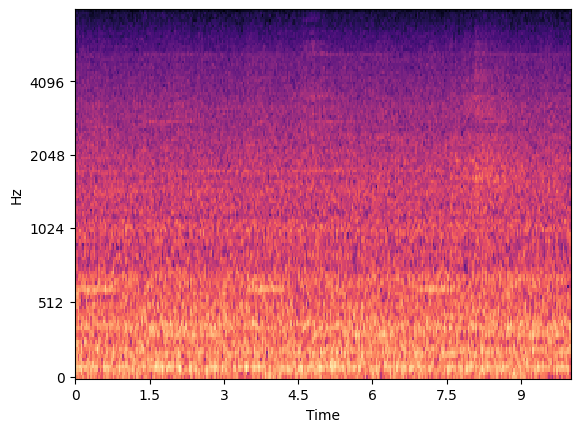

In [44]:
path = 'data/melspec/normal_id_00_00000000.npy'
plot_spectro(path)